In [243]:
import pandas as pd
from urllib import request
from bs4 import BeautifulSoup
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# 課題1 
## 下記のテーブル内容を取得し、「URL」を引数にとりテーブルをデータフレームとして出力する関数を作成して下さい。(コードを貼って下さい) 

In [5]:

def scrR(url):
    html = request.urlopen(url)
    soup = BeautifulSoup(html, 'html.parser')
    
    td = soup.findAll("td")
    th = soup.findAll("th")

    th_s = []
    td_s = []
    
    for i in range(len(th)):
      th_s.append(th[i].string)
    for i in range(len(td)):
      td_s.append(td[i].string)
    
    td_s = np.reshape(td_s, (120, 45))

    return pd.DataFrame(td_s, columns = th_s)

In [6]:
df = scrR("http://web.sfc.keio.ac.jp/~sk/ynl-r-homework.html")

In [10]:
for column in df.columns:
    print(column)

日時
天気
気温
１.オムニバス
２.ウエスタンリバー鉄道
３.カリブの海賊
４.ジャングルクルーズ
５.スイスファイミリーツリーハウス
６.魅惑のチキルーム：スティッチ・プレゼンツアロハ・エ・コモ・マイ！
７.ビッグサンダー・マウンテン
８.ウエスタンランド・シューティングギャラリー
９.カントリーベア・シアター
１０.トムソーヤ島いかだ
１１.蒸気船マークトウェイン号
１２.スプラッシュ・マウンテン
１３.ビーバーブラザーズのカヌー探険
１４.プーさんのハニーハント
１５.ホーンテッドマンション
１６.アリスのティーパーティー
１７.イッツ・ア・スモールワールド
１８.キャッスルカルーセル
１９.シンデレラのフェアリーテイル・ホール
２０.ピノキオの冒険旅行
２１.ピーターパン空の旅
２２.ミッキーのフィルハーマジック
２３.白雪姫と七人のこびと
２４.空飛ぶダンボ
２５.ガジェットのゴーコースター
２６.グーフィーのペイント＆プレイハウス
２７.チップとデールのツリーハウス
２８.ドナルドのボート
２９.ミニーの家
３０.ロジャーラビットのカートゥーンスピン
３１.スター・ツアーズ：ザ・アドベンチャーズ・コンティニュー
３２.スペース・マウンテン
３３.バズライトイヤーのアストロブラスター
３４.モンスターズ・インク“ライド＆ゴーシーク！”
３５.グランドサーキット・レースウェイ
３６.スタージェット
３７.スティッチ・エンカウンター（キャプテンＥＯ・ミクロアドベンチャー！）
３８.エントランスグリ（ベビーカー、車椅子レンタル側）
３９.エントランスグリ（メインストリート・ハウス側）
４０.ウッドチャック・グリーティングトレイル（デイジー）
４１.ウッドチャック・グリーティングトレイル（ドナルド）
４２.ミッキーの家とミート・ミッキー


# 課題2
## 課題1で出力されたデータフレームを 「日時」「天気」「気温」「アトラクション名」「待ち時間」 
## の５つのカラムで構成されるデータフレームに変換して下さい。(コードを貼って下さい)

In [378]:
#課題2
#課題1で出力されたデータフレームを 「日時」「天気」「気温」「アトラクション名」「待ち時間」 
#の５つのカラムで構成されるデータフレームに変換して下さい。(コードを貼って下さい)


df = scrR("http://web.sfc.keio.ac.jp/~sk/ynl-r-homework.html")


df_changed = df[df.columns[3:45]]

#アトラクション名が入った配列を作成
atractions = []
for i in range(42):
    atr = [df.columns[i + 3]]*120
    atractions.extend(atr)#長さ120*42ね

In [30]:
#待ち時間が入った配列を作成
wait = []
for i in range(42):
    con = df_changed[df_changed.columns[i]]
    wait.extend(con)

In [31]:
df

,日時,天気,気温,１.オムニバス,２.ウエスタンリバー鉄道,３.カリブの海賊,４.ジャングルクルーズ,５.スイスファイミリーツリーハウス,６.魅惑のチキルーム：スティッチ・プレゼンツアロハ・エ・コモ・マイ！,７.ビッグサンダー・マウンテン,...,３３.バズライトイヤーのアストロブラスター,３４.モンスターズ・インク“ライド＆ゴーシーク！”,３５.グランドサーキット・レースウェイ,３６.スタージェット,３７.スティッチ・エンカウンター（キャプテンＥＯ・ミクロアドベンチャー！）,３８.エントランスグリ（ベビーカー、車椅子レンタル側）,３９.エントランスグリ（メインストリート・ハウス側）,４０.ウッドチャック・グリーティングトレイル（デイジー）,４１.ウッドチャック・グリーティングトレイル（ドナルド）,４２.ミッキーの家とミート・ミッキー
0,2018/5/27 15:30,晴,26.0,-,25,30,40,0,5,90,...,50,-,-,-,35,-,-,45,45,65
1,2018/5/28 15:30,曇,23.9,-,35,35,45,0,10,140,...,-,110,-,-,35,-,-,40,40,65
2,2018/5/29 15:30,晴,25.8,-,20,15,25,0,5,90,...,30,60,-,-,10,-,-,30,45,45
3,2018/5/30 15:30,曇,23.8,-,10,5,15,0,5,60,...,30,40,-,-,15,-,-,25,45,45
4,2018/5/31 15:30,曇,21.4,0,15,5,10,0,5,30,...,25,30,-,-,10,-,-,35,40,45
5,2018/6/1 15:30,曇,23.2,5,25,15,30,0,5,40,...,45,50,-,-,25,-,-,25,30,50
6,2018/6/2 15:30,晴,27.0,-,35,30,40,0,10,70,...,100,90,-,-,35,-,-,45,50,65
7,2018/6/3 15:30,晴,27.3,-,30,20,35,0,5,80,...,82,70,-,-,20,-,-,40,40,65
8,2018/6/4 15:30,晴,27.3,-,30,25,35,0,-,100,...,90,70,-,-,30,-,-,35,40,65
9,2018/6/5 15:30,晴,28.2,-,20,10,15,0,-,50,...,35,35,-,-,20,-,-,35,30,45


In [33]:
df = df[["日時", "天気", "気温"]]

In [34]:
df

,日時,天気,気温
0,2018/5/27 15:30,晴,26.0
1,2018/5/28 15:30,曇,23.9
2,2018/5/29 15:30,晴,25.8
3,2018/5/30 15:30,曇,23.8
4,2018/5/31 15:30,曇,21.4
5,2018/6/1 15:30,曇,23.2
6,2018/6/2 15:30,晴,27.0
7,2018/6/3 15:30,晴,27.3
8,2018/6/4 15:30,晴,27.3
9,2018/6/5 15:30,晴,28.2


In [35]:
#atractions[], wait[]と合うようにdfの長さを調節
df_a = df

for i in range(41):
    df = df.append(df_a)

print(len(df))

#アトラクション名と待ち時間の配列をcancat()使って元のdfとくっつける
#元のdfじゃないやいらんとこ削除したやつや
df["アトラクション名"] = atractions
df["待ち時間"] = wait

5040


In [36]:
df

,日時,天気,気温,アトラクション名,待ち時間
0,2018/5/27 15:30,晴,26.0,１.オムニバス,-
1,2018/5/28 15:30,曇,23.9,１.オムニバス,-
2,2018/5/29 15:30,晴,25.8,１.オムニバス,-
3,2018/5/30 15:30,曇,23.8,１.オムニバス,-
4,2018/5/31 15:30,曇,21.4,１.オムニバス,0
5,2018/6/1 15:30,曇,23.2,１.オムニバス,5
6,2018/6/2 15:30,晴,27.0,１.オムニバス,-
7,2018/6/3 15:30,晴,27.3,１.オムニバス,-
8,2018/6/4 15:30,晴,27.3,１.オムニバス,-
9,2018/6/5 15:30,晴,28.2,１.オムニバス,-


# 課題3. 「ジャングルクルーズ」「プーさんのハニーハント」「ミニーの家」の待ち時間のヒストグラムを作図して下さい。 なお、平均と1SD値に補助線も引いて下さい。

In [452]:
test = pd.read_csv("rt.csv", index_col=0)

In [453]:
test

,日付,TIME,れすとらん北齋,ｱｲｽｸﾘｰﾑｺｰﾝ,ｲﾍﾞﾝﾄﾌﾞｰｽ.ｼﾝﾃﾞﾚﾗ城前ﾌﾟﾗｻﾞ.ｱﾄﾞﾍﾞﾝﾁｬｰﾗﾝﾄﾞ側.,ｲﾍﾞﾝﾄﾌﾞｰｽ.ｼﾝﾃﾞﾚﾗ城前ﾌﾟﾗｻﾞ.ﾄｩﾓﾛｰﾗﾝﾄﾞ側.,ｲﾍﾞﾝﾄﾌﾞｰｽ.ｼﾝﾃﾞﾚﾗ城前ﾌﾟﾗｻﾞ.ﾜｰﾙﾄﾞﾊﾞｻﾞｰﾙ側.,ｲｰｽﾄｻｲﾄﾞ.ｶﾌｪ,ｸﾞﾚｰﾄｱﾒﾘｶﾝ.ﾜｯﾌﾙｶﾝﾊﾟﾆｰ,ｽｳｨｰﾄﾊｰﾄ.ｶﾌｪ,...,ﾋｭｰｲ.ﾃﾞｭｰｲ.ﾙｰｲのｸﾞｯﾄﾞﾀｲﾑ.ｶﾌｪ,ﾐｯｷｰのﾄﾚｰﾗｰ,ﾄｩｰﾝﾄｰﾝ.ﾄﾘｰﾄ,ｽﾍﾟｰｽﾌﾟﾚｰｽ.ﾌｰﾄﾞﾎﾟｰﾄ,ｿﾌﾄﾗﾝﾃﾞｨﾝｸﾞ.2F.,ﾄｩﾓﾛｰﾗﾝﾄﾞ.ﾃﾗｽ,ﾊﾟﾝ.ｷﾞｬﾗｸﾃｨｯｸ.ﾋﾟｻﾞ.ﾎﾟｰﾄ,ﾌﾟﾗｽﾞﾏ.ﾚｲｽﾞ.ﾀﾞｲﾅｰ,ﾗｲﾄﾊﾞｲﾄ.ｻﾃﾗｲﾄ,ｷｬﾘｯｼﾞﾊｳｽ.ﾘﾌﾚｯｼｭﾒﾝﾄ
1,5月27日,08:15,-,-,-,-,-,-,-,0～20,...,-,-,-,-,-,-,-,-,0～20,-
2,5月27日,08:45,-,-,-,-,-,-,0～20,0～20,...,0～20,-,-,-,-,0～20,0～20,0～20,0～20,-
3,5月27日,09:15,-,0～20,-,-,-,-,0～20,0～20,...,0～20,0～20,0～20,-,-,0～20,0～20,0～20,0～20,-
4,5月27日,09:45,-,0～20,-,-,-,-,0～20,0～20,...,0～20,0～20,0～20,-,-,0～20,0～20,0～20,0～20,-
5,5月27日,10:15,-,0～20,-,-,-,-,0～20,0～20,...,0～20,0～20,0～20,-,0～20,0～20,0～20,0～20,0～20,-
6,5月27日,10:45,15,0～20,-,-,-,0,0～20,0～20,...,20～40,0～20,0～20,-,0～20,0～20,0～20,0～20,15,-
7,5月27日,11:15,30,0～20,-,-,-,20,0～20,0～20,...,20～40,0～20,0～20,-,0～20,0～20,0～20,0～20,30,-
8,5月27日,11:45,30,0～20,-,-,-,30,0～20,0～20,...,20～40,0～20,0～20,-,0～20,0～20,0～20,0～20,30,-
9,5月27日,12:15,30,0～20,-,-,-,50,0～20,0～20,...,20～40,0～20,0～20,-,0～20,20～40,0～20,0～20,30,-
10,5月27日,12:45,30,0～20,-,-,-,80,40以上,0～20,...,20～40,0～20,0～20,-,0～20,20～40,0～20,0～20,30,-


In [89]:
df = scrR("http://web.sfc.keio.ac.jp/~sk/ynl-r-homework.html")

In [90]:
df

,日時,天気,気温,１.オムニバス,２.ウエスタンリバー鉄道,３.カリブの海賊,４.ジャングルクルーズ,５.スイスファイミリーツリーハウス,６.魅惑のチキルーム：スティッチ・プレゼンツアロハ・エ・コモ・マイ！,７.ビッグサンダー・マウンテン,...,３３.バズライトイヤーのアストロブラスター,３４.モンスターズ・インク“ライド＆ゴーシーク！”,３５.グランドサーキット・レースウェイ,３６.スタージェット,３７.スティッチ・エンカウンター（キャプテンＥＯ・ミクロアドベンチャー！）,３８.エントランスグリ（ベビーカー、車椅子レンタル側）,３９.エントランスグリ（メインストリート・ハウス側）,４０.ウッドチャック・グリーティングトレイル（デイジー）,４１.ウッドチャック・グリーティングトレイル（ドナルド）,４２.ミッキーの家とミート・ミッキー
0,2018/5/27 15:30,晴,26.0,-,25,30,40,0,5,90,...,50,-,-,-,35,-,-,45,45,65
1,2018/5/28 15:30,曇,23.9,-,35,35,45,0,10,140,...,-,110,-,-,35,-,-,40,40,65
2,2018/5/29 15:30,晴,25.8,-,20,15,25,0,5,90,...,30,60,-,-,10,-,-,30,45,45
3,2018/5/30 15:30,曇,23.8,-,10,5,15,0,5,60,...,30,40,-,-,15,-,-,25,45,45
4,2018/5/31 15:30,曇,21.4,0,15,5,10,0,5,30,...,25,30,-,-,10,-,-,35,40,45
5,2018/6/1 15:30,曇,23.2,5,25,15,30,0,5,40,...,45,50,-,-,25,-,-,25,30,50
6,2018/6/2 15:30,晴,27.0,-,35,30,40,0,10,70,...,100,90,-,-,35,-,-,45,50,65
7,2018/6/3 15:30,晴,27.3,-,30,20,35,0,5,80,...,82,70,-,-,20,-,-,40,40,65
8,2018/6/4 15:30,晴,27.3,-,30,25,35,0,-,100,...,90,70,-,-,30,-,-,35,40,65
9,2018/6/5 15:30,晴,28.2,-,20,10,15,0,-,50,...,35,35,-,-,20,-,-,35,30,45


In [402]:
df[df.columns[3:45]] = df[df.columns[3:45]].replace('-',np.nan)

In [95]:
jungle_cruise = df["４.ジャングルクルーズ"].dropna(axis=0).astype(int)

/Users/marie/miniconda3/envs/mariko/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


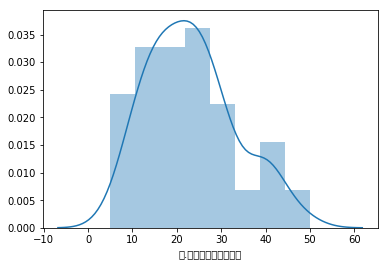

In [97]:
sns.distplot(jungle_cruise)

In [105]:
poo_san = df["１４.プーさんのハニーハント"].dropna(axis=0).astype(int)

/Users/marie/miniconda3/envs/mariko/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


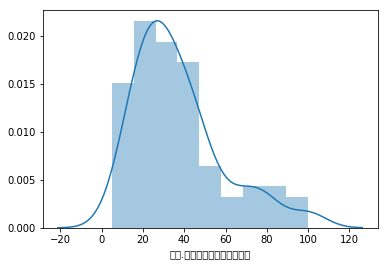

In [106]:
sns.distplot(poo_san)

In [118]:
minnie_house = df["２９.ミニーの家"].dropna(axis=0).astype(int)

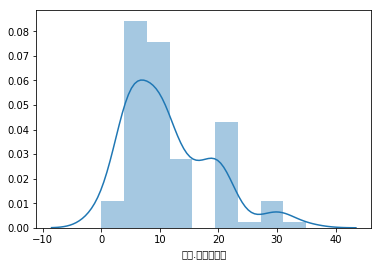

In [119]:
sns.distplot(minnie_house)

In [132]:
def get_stats(input):
    data = {}
    data["mean"]=(input.mean())
    data["standard_deviation_positive"] = (input.mean()+ input.std())
    data["standard_deviation_negative"]=(input.mean() - input.std())
    return data

In [133]:
jungle_cruise_stats = get_stats(jungle_cruise)
poo_san_stats = get_stats(poo_san)
minnie_house_stats = get_stats(minnie_house)

In [134]:
jungle_cruise_stats

{'mean': 23.25242718446602,
 'standard_deviation_positive': 33.22072836193573,
 'standard_deviation_negative': 13.28412600699631}

In [135]:
poo_san_stats

{'mean': 37.04545454545455,
 'standard_deviation_positive': 58.56310786519913,
 'standard_deviation_negative': 15.527801225709968}

In [136]:
minnie_house_stats

{'mean': 25.34114656801941,
 'standard_deviation_positive': 64.58733235769706,
 'standard_deviation_negative': -13.905039221658242}

/Users/marie/miniconda3/envs/mariko/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


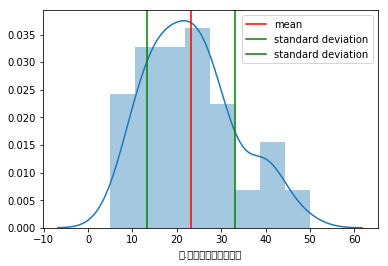

In [142]:
sns.distplot(jungle_cruise)
plt.axvline(jungle_cruise_stats["mean"], 0, 1, color="red", label="mean")
plt.axvline(jungle_cruise_stats["standard_deviation_positive"], 0, 1, color="green", label="standard deviation")
plt.axvline(jungle_cruise_stats["standard_deviation_negative"], 0, 1, color="green", label="standard deviation")
plt.legend()

/Users/marie/miniconda3/envs/mariko/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


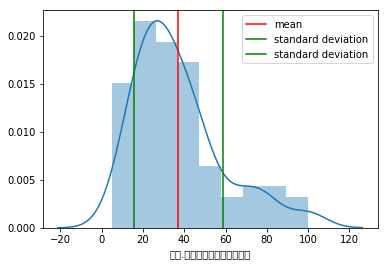

In [143]:
sns.distplot(poo_san)
plt.axvline(poo_san_stats["mean"], 0, 1, color="red", label="mean")
plt.axvline(poo_san_stats["standard_deviation_positive"], 0, 1, color="green", label="standard deviation")
plt.axvline(poo_san_stats["standard_deviation_negative"], 0, 1, color="green", label="standard deviation")
plt.legend()

/Users/marie/miniconda3/envs/mariko/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


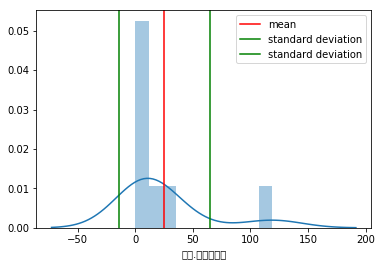

In [144]:
sns.distplot(minnie_house)
plt.axvline(minnie_house_stats["mean"], 0, 1, color="red", label="mean")
plt.axvline(minnie_house_stats["standard_deviation_positive"], 0, 1, color="green", label="standard deviation")
plt.axvline(minnie_house_stats["standard_deviation_negative"], 0, 1, color="green", label="standard deviation")
plt.legend()

# 課題4 
## 「ビッグサンダーマウンテン」の待ち時間を予測する重回帰モデルを作成し、5月26日の待ち時間を予測して下さい。なお、予測に用いた説明変数も理由と共に明記して下さい。 5月26日は気温：22.8、晴です。

In [620]:
restaurant_time = pd.read_csv("rt.csv", index_col=0)

In [621]:
area_map = pd.read_csv("area-map.csv", index_col=0)

In [622]:
facility_list = pd.read_csv("facility-list.csv", index_col=0)

In [643]:
df = pd.read_csv("wt.csv", index_col=0)

In [644]:
train = df[["気温", "時刻", "天気", "ビッグサンダー・マウンテン"]]

In [645]:
dummy_weather = pd.get_dummies(train["天気"]).drop(["少雨"], axis=1)

In [646]:
train.drop(["天気"], axis=1, inplace=True)

In [647]:
dummy_time = pd.get_dummies(train["時刻"]).drop(["08:15"], axis=1)

In [648]:
train.drop(["時刻"], axis=1, inplace=True)

In [649]:
train_new = pd.concat([train, dummy_weather], axis=1)

In [650]:
train_new.head()

,気温,ビッグサンダー・マウンテン,晴,曇,月,雨
1,19.1,50.0,1,0,0,0
2,19.1,80.0,1,0,0,0
3,20.5,120.0,1,0,0,0
4,20.5,100.0,1,0,0,0
5,22.0,90.0,1,0,0,0


In [651]:
train_new = pd.concat([train_new, dummy_time], axis=1)

In [652]:
train_new["気温"] = pd.to_numeric(train_new["気温"], errors='coerce')

In [653]:
train_new.dropna(axis=0, inplace=True)

In [654]:
train_new.head()

,気温,ビッグサンダー・マウンテン,晴,曇,月,雨,08:45,09:15,09:45,10:15,...,17:45,18:15,18:45,19:15,19:45,20:15,20:45,21:15,21:45,21:46
1,19.1,50.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,19.1,80.0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20.5,120.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20.5,100.0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,22.0,90.0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [655]:
X = train_new.drop(["ビッグサンダー・マウンテン"], axis=1).values

In [656]:
y = train_new["ビッグサンダー・マウンテン"].values

In [657]:
lm = linear_model.LinearRegression()

In [658]:
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [659]:
X.shape

(3269, 33)

In [660]:
train_new.drop(["ビッグサンダー・マウンテン"], axis=1).columns

Index(['気温', '晴', '曇', '月', '雨', '08:45', '09:15', '09:45', '10:15', '10:45',
       '11:15', '11:45', '12:15', '12:45', '13:15', '13:45', '14:15', '14:45',
       '15:15', '15:45', '16:15', '16:45', '17:15', '17:45', '18:15', '18:45',
       '19:15', '19:45', '20:15', '20:45', '21:15', '21:45', '21:46'],
      dtype='object')

In [808]:
new_row = {}

for column in train_new.drop(["ビッグサンダー・マウンテン"], axis=1).columns:
    new_row[column] = 0

In [809]:
new_row["気温"] = 22.8

In [810]:
new_row["晴"] = 1

In [811]:
new_row["15:15"] = 1

In [812]:
new_row = pd.DataFrame.from_records([new_row]).values

## Predicted Time

In [813]:
lm.predict(new_row)[0]

11.570762126656529

# 課題5. 
## 5/26 15:30に乗るべきアトラクションは何ですか？乗るべきでないアトラクションは何ですか？

In [933]:
def predict_wait_time(_attraction_name):
    try:
        train = df[["気温", "時刻", "天気", _attraction_name]]
        dummy_weather = pd.get_dummies(train["天気"]).drop(["少雨"], axis=1)
        train.drop(["天気"], axis=1, inplace=True)
        dummy_time = pd.get_dummies(train["時刻"]).drop(["08:15"], axis=1)
        train.drop(["時刻"], axis=1, inplace=True)
        train_new = pd.concat([train, dummy_weather], axis=1)
        train_new = pd.concat([train_new, dummy_time], axis=1)
        train_new["気温"] = pd.to_numeric(train_new["気温"], errors='coerce')
        train_new.dropna(axis=0, inplace=True)
        X = train_new.drop([_attraction_name], axis=1).values
        y = train_new[_attraction_name].values
        lm = linear_model.LinearRegression()
        lm.fit(X, y)
        return lm.predict(new_row)[0]
    except:
        import traceback
        traceback.print_exc()

In [934]:
new_df = pd.read_csv("wt.csv", index_col=0)

In [935]:
new_row_g={}

for column in new_df.columns:
    new_row_g[column] = 0.0

In [936]:
new_row_g['気温'] = 22.8

In [937]:
new_row_g['天気'] = "晴"

In [938]:
new_row_g

{'日付': 0.0,
 '時刻': 0.0,
 '気温': 22.8,
 '天気': '晴',
 'オムニバス': 0.0,
 'ウエスタンリバー鉄道': 0.0,
 'カリブの海賊': 0.0,
 'ジャングルクルーズ': 0.0,
 'スイスファイミリーツリーハウス': 0.0,
 '魅惑のチキルーム：スティッチ・プレゼンツアロハ・エ・コモ・マイ！': 0.0,
 'ビッグサンダー・マウンテン': 0.0,
 'ウエスタンランド・シューティングギャラリー': 0.0,
 'カントリーベア・シアター': 0.0,
 'トムソーヤ島いかだ': 0.0,
 '蒸気船マークトウェイン号': 0.0,
 'スプラッシュ・マウンテン': 0.0,
 'ビーバーブラザーズのカヌー探険': 0.0,
 'プーさんのハニーハント': 0.0,
 'ホーンテッドマンション': 0.0,
 'アリスのティーパーティー': 0.0,
 'イッツ・ア・スモールワールド': 0.0,
 'キャッスルカルーセル': 0.0,
 'シンデレラのフェアリーテイル・ホール': 0.0,
 'ピノキオの冒険旅行': 0.0,
 'ピーターパン空の旅': 0.0,
 'ミッキーのフィルハーマジック': 0.0,
 '白雪姫と七人のこびと': 0.0,
 '空飛ぶダンボ': 0.0,
 'ガジェットのゴーコースター': 0.0,
 'グーフィーのペイント＆プレイハウス': 0.0,
 'チップとデールのツリーハウス': 0.0,
 'ドナルドのボート': 0.0,
 'ミニーの家': 0.0,
 'ロジャーラビットのカートゥーンスピン': 0.0,
 'スター・ツアーズ：ザ・アドベンチャーズ・コンティニュー': 0.0,
 'スペース・マウンテン': 0.0,
 'バズライトイヤーのアストロブラスター': 0.0,
 'モンスターズ・インク“ライド＆ゴーシーク！”': 0.0,
 'グランドサーキット・レースウェイ': 0.0,
 'スタージェット': 0.0,
 'スティッチ・エンカウンター（キャプテンＥＯ・ミクロアドベンチャー！）': 0.0,
 'エントランスグリ（ベビーカー、車椅子レンタル側）': 0.0,
 'エントランスグリ（メインストリート・ハウス側）': 0.0,
 'ウッドチャック・

In [939]:
df.columns.values

array(['日付', '時刻', '気温', '天気', 'オムニバス', 'ウエスタンリバー鉄道', 'カリブの海賊',
       'ジャングルクルーズ', 'スイスファイミリーツリーハウス', '魅惑のチキルーム：スティッチ・プレゼンツアロハ・エ・コモ・マイ！',
       'ビッグサンダー・マウンテン', 'ウエスタンランド・シューティングギャラリー', 'カントリーベア・シアター',
       'トムソーヤ島いかだ', '蒸気船マークトウェイン号', 'スプラッシュ・マウンテン', 'ビーバーブラザーズのカヌー探険',
       'プーさんのハニーハント', 'ホーンテッドマンション', 'アリスのティーパーティー', 'イッツ・ア・スモールワールド',
       'キャッスルカルーセル', 'シンデレラのフェアリーテイル・ホール', 'ピノキオの冒険旅行', 'ピーターパン空の旅',
       'ミッキーのフィルハーマジック', '白雪姫と七人のこびと', '空飛ぶダンボ', 'ガジェットのゴーコースター',
       'グーフィーのペイント＆プレイハウス', 'チップとデールのツリーハウス', 'ドナルドのボート', 'ミニーの家',
       'ロジャーラビットのカートゥーンスピン', 'スター・ツアーズ：ザ・アドベンチャーズ・コンティニュー', 'スペース・マウンテン',
       'バズライトイヤーのアストロブラスター', 'モンスターズ・インク“ライド＆ゴーシーク！”', 'グランドサーキット・レースウェイ',
       'スタージェット', 'スティッチ・エンカウンター（キャプテンＥＯ・ミクロアドベンチャー！）',
       'エントランスグリ（ベビーカー、車椅子レンタル側）', 'エントランスグリ（メインストリート・ハウス側）',
       'ウッドチャック・グリーティングトレイル（デイジー）', 'ウッドチャック・グリーティングトレイル（ドナルド）',
       'ミッキーの家とミート・ミッキー'], dtype=object)

In [940]:
for column in new_df.columns.values[4:]:
    result = predict_wait_time(column)
    new_row_g[column] = result

/Users/marie/miniconda3/envs/mariko/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/marie/miniconda3/envs/mariko/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/marie/miniconda3/envs/mariko/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/marie/miniconda3/envs/marik

/Users/marie/miniconda3/envs/mariko/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/marie/miniconda3/envs/mariko/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/marie/miniconda3/envs/mariko/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/marie/miniconda3/envs/marik

In [941]:
new_row_g['ミッキーの家とミート・ミッキー']

-591.6451002599428

In [942]:
new_row_g

{'日付': 0.0,
 '時刻': 0.0,
 '気温': 22.8,
 '天気': '晴',
 'オムニバス': 3.31164858749787,
 'ウエスタンリバー鉄道': 86.46657894468795,
 'カリブの海賊': 111.9006303168194,
 'ジャングルクルーズ': 178.86071749536316,
 'スイスファイミリーツリーハウス': 0.034592825586325086,
 '魅惑のチキルーム：スティッチ・プレゼンツアロハ・エ・コモ・マイ！': -23.4267669497498,
 'ビッグサンダー・マウンテン': 11.570762126656529,
 'ウエスタンランド・シューティングギャラリー': 101.67806685423308,
 'カントリーベア・シアター': 4.425559348771974,
 'トムソーヤ島いかだ': 3.0679678760286566,
 '蒸気船マークトウェイン号': 32.97168614711532,
 'スプラッシュ・マウンテン': -153.39188187172005,
 'ビーバーブラザーズのカヌー探険': 28.086944596161352,
 'プーさんのハニーハント': 46.45041762039938,
 'ホーンテッドマンション': -502.9185242258026,
 'アリスのティーパーティー': -121.85101730215747,
 'イッツ・ア・スモールワールド': 61.83764431303006,
 'キャッスルカルーセル': 80.11345389290278,
 'シンデレラのフェアリーテイル・ホール': 30.90352858689466,
 'ピノキオの冒険旅行': 61.706859279849816,
 'ピーターパン空の旅': 244.3355234098538,
 'ミッキーのフィルハーマジック': 102.8091014894516,
 '白雪姫と七人のこびと': 94.58497846967396,
 '空飛ぶダンボ': 329.55470330398435,
 'ガジェットのゴーコースター': 195.13371451203716,
 'グーフィーのペイント＆プレイハウス': 121.19

In [943]:
new_row_g = pd.DataFrame.from_records([new_row_g])

In [944]:
new_row_g

,アリスのティーパーティー,イッツ・ア・スモールワールド,ウエスタンランド・シューティングギャラリー,ウエスタンリバー鉄道,ウッドチャック・グリーティングトレイル（デイジー）,ウッドチャック・グリーティングトレイル（ドナルド）,エントランスグリ（ベビーカー、車椅子レンタル側）,エントランスグリ（メインストリート・ハウス側）,オムニバス,カリブの海賊,...,モンスターズ・インク“ライド＆ゴーシーク！”,ロジャーラビットのカートゥーンスピン,天気,日付,時刻,気温,白雪姫と七人のこびと,空飛ぶダンボ,蒸気船マークトウェイン号,魅惑のチキルーム：スティッチ・プレゼンツアロハ・エ・コモ・マイ！
0,-121.851017,61.837644,101.678067,86.466579,274.152847,153.382016,48.490872,29.454323,3.311649,111.90063,...,-468.568557,171.622619,晴,0.0,0.0,22.8,94.584978,329.554703,32.971686,-23.426767


In [867]:
new_df = pd.concat([new_row_g, new_df], axis=0, ignore_index=True)

In [869]:
new_row_g

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,アリスのティーパーティー,イッツ・ア・スモールワールド,ウエスタンランド・シューティングギャラリー,ウエスタンリバー鉄道,ウッドチャック・グリーティングトレイル（デイジー）,ウッドチャック・グリーティングトレイル（ドナルド）,エントランスグリ（ベビーカー、車椅子レンタル側）,エントランスグリ（メインストリート・ハウス側）,オムニバス,カリブの海賊,...,ロジャーラビットのカートゥーンスピン,天気,日付,日時,時刻,気温,白雪姫と七人のこびと,空飛ぶダンボ,蒸気船マークトウェイン号,魅惑のチキルーム：スティッチ・プレゼンツアロハ・エ・コモ・マイ！
